# Inerpretation-Net

## Specification of Experiment Settings

In [1]:
'''
Anpassen: 

number_of_variables --> anzahl variablen

lambda_dataset_size --> datensatz größe für training von lambda-nets
number_of_generated_datasets and  number_of_trained_lambda_nets and interpretation_dataset_size --> anzahl der lambda-nets

lambda net --> alles wie in notebook 2

i net -->
'''

'\nAnpassen: \n\nnumber_of_variables --> anzahl variablen\n\nlambda_dataset_size --> datensatz größe für training von lambda-nets\nnumber_of_generated_datasets and  number_of_trained_lambda_nets and interpretation_dataset_size --> anzahl der lambda-nets\n\nlambda net --> alles wie in notebook 2\n\ni net -->\n'

In [2]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 4,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,    
        'dt_type': 'vanilla', #'SDT', 'vanilla'
    },
    'data': {
        'number_of_variables': 10, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'use_distribution_list': True,
        'random_parameters_distribution': True, ##MAKEPATH DIFFERENT FILES
        'max_distributions_per_class': 1, # None; 0; int >= 1  
        'exclude_linearly_seperable': True,
        'data_generation_filtering': False,
        'fixed_class_probability': False,
        'balanced_data': True,
        'weighted_data_generation': False,
        'shift_distrib': False,
        
        'dt_type_train': 'vanilla', # (None, 'vanilla', 'SDT')
        'maximum_depth_train': 4, #None or int
        'decision_sparsity_train': 1, #None or int
        
        'function_generation_type': 'make_classification',# 'make_classification_distribution', 'make_classification_distribution_trained', 'distribution', 'distribution_trained', 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'distrib_by_feature': True,
        'distribution_list': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'], 
        'distribution_list_eval': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'beta', 'poisson'],
        
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 10_000,
        
        'noise_injected_level': 0, 
        'noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'
        
        'data_noise': 0, #None or float
        
        'distrib_param_max': 5,
        
    }, 
    'lambda_net': {
        'epochs_lambda': 1000,
        'early_stopping_lambda': True, 
        'early_stopping_min_delta_lambda': 1e-3,
        'restore_best_weights': True,
        'patience_lambda': 50,
        
        'batch_lambda': 64,
        'dropout_lambda': 0,
        'lambda_network_layers': [50],
        'use_batchnorm_lambda': False,
        
        'optimizer_lambda': 'adam',
        'loss_lambda': 'binary_crossentropy', #categorical_crossentropy
        
        'number_of_lambda_weights': None,
        
        'number_initializations_lambda': 1, 
        
        'number_of_trained_lambda_nets': 10_000,
    },     
    
    'i_net': {
         #'dense_layers': [1024, 1024, 256, 2048, 2048],
        'dense_layers': [1792, 512, 512],
        #'dense_layers': [1792, 512, 512],
        
        #'dropout': [0, 0, 0, 0, 0.3],#[0.3, 0.3, 0.3, 0.3, 0.3],
        'dropout': [0.5, 0.5, 0.5],
        #'dropout': [0, 0, 0.5],

        #'hidden_activation': 'relu',
        'hidden_activation': 'sigmoid',
        #'hidden_activation': 'swish',

        #'optimizer': 'rmsprop', 
        'optimizer': 'adam', 
        #'optimizer': 'adam', 
        
        #'learning_rate': 0.001,
        'learning_rate': 0.001,
        #'learning_rate': 0.001, 
        
        'separate_weight_bias': False,
        
        'convolution_layers': None,
        'lstm_layers': None,        
        'additional_hidden': False,
        
        'loss': 'binary_crossentropy', #mse; binary_crossentropy; 'binary_accuracy'
        'metrics': ['binary_accuracy'], #soft_ or _penalized
        
        'epochs': 10, #500
        'early_stopping': True,
        'batch_size': 256,

        'interpretation_dataset_size': 10_000,
                
        'test_size': 1_000, #Float for fraction, Int for number 0
        'evaluate_distribution': True,
        'force_evaluate_real_world': False,
        
        'function_representation_type': 1, # 1=standard representation; 2=sparse representation with classification for variables; 3=softmax to select classes (n top probabilities)
        'normalize_lambda_nets': False,

        'optimize_decision_function': True, #False
        'function_value_loss': True, #False
                      
        'data_reshape_version': None, #default to 2 options:(None, 0,1 2,3) #3=autoencoder dimensionality reduction
        
        'resampling_strategy': None,#'ADASYN', #'SMOTE', None
        'resampling_threshold': 0.2,#0.2,
        
        'nas': False,
        'nas_type': 'SEQUENTIAL', #options:(None, 'SEQUENTIAL', 'CNN', 'LSTM', 'CNN-LSTM', 'CNN-LSTM-parallel')      
        'nas_trials': 60,
        'nas_optimizer': 'greedy', #'hyperband',#"bayesian",'greedy', 'random'
        
        'train_noise': 0
    },    
    
    'evaluation': {   
        #'inet_holdout_seed_evaluation': False,
        
        'number_of_random_evaluations_per_distribution': 10,
        'random_evaluation_dataset_size_per_distribution': 10_000, 
        'optimize_sampling': True,
            
        'random_evaluation_dataset_size': 500, 
        'random_evaluation_dataset_distribution': 'uniform', 
        
        'per_network_optimization_dataset_size': 5000,

        #'sklearn_dt_benchmark': False,
        #'sdt_benchmark': False,
        
        'different_eval_data': False,
        
        'eval_data_description': {
            ######### data #########
            'eval_data_function_generation_type': 'make_classification',
            'eval_data_lambda_dataset_size': 5000, #number of samples per function
            'eval_data_noise_injected_level': 0, 
            'eval_data_noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'     
            ######### lambda_net #########
            'eval_data_number_of_trained_lambda_nets': 100,
            ######### i_net #########
            'eval_data_interpretation_dataset_size': 100,
        }
        
    },    
    
    'computation':{
        'load_model': False,
        'n_jobs': 50,
        'use_gpu': True,
        'gpu_numbers': '2',
        'RANDOM_SEED': 42,   
        'verbosity': 0
    }
}


### Imports

In [3]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [4]:
#######################################################################################################################################
##################################################### IMPORT LIBRARIES ################################################################
#######################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import logging

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)

from itertools import product       
from tqdm.notebook import tqdm
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import timeit
import psutil

from functools import reduce
from more_itertools import random_product 
from sklearn.preprocessing import Normalizer

import sys
import shutil

from copy import deepcopy
import math
import random 


import time
from datetime import datetime
from collections.abc import Iterable


from joblib import Parallel, delayed

from scipy.integrate import quad

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, ParameterGrid, ParameterSampler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, mean_absolute_error, r2_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.keras.backend as K
from livelossplot import PlotLossesKerasTF
#from keras_tqdm import TQDMNotebookCallback

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.display import display, Math, Latex, clear_output

from prettytable import PrettyTable

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import xgboost as xgb



In [5]:
tf.__version__

'2.9.1'

In [6]:
#######################################################################################################################################
################################################### VARIABLE ADJUSTMENTS ##############################################################
#######################################################################################################################################

config['i_net']['data_reshape_version'] = 2 if data_reshape_version == None and (convolution_layers != None or lstm_layers != None or (nas and nas_type != 'SEQUENTIAL')) else data_reshape_version
config['function_family']['decision_sparsity'] = config['function_family']['decision_sparsity'] if config['function_family']['decision_sparsity'] != -1 else config['data']['number_of_variables'] 

#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_numbers if use_gpu else ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' if use_gpu else ''

#os.environ['XLA_FLAGS'] =  '--xla_gpu_cuda_data_dir=/usr/local/cuda-10.1'

#os.environ['XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda-11.4' if use_gpu else ''#-10.1' #--xla_gpu_cuda_data_dir=/usr/local/cuda, 
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 ,--tf_xla_enable_xla_devices' if use_gpu else ''#'--tf_xla_auto_jit=2' #, --tf_xla_enable_xla_devices


sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if int(tf.__version__[0]) >= 2:
    tf.random.set_seed(RANDOM_SEED)
else:
    tf.set_random_seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
np.set_printoptions(threshold=200)
np.set_printoptions(suppress=True)



In [7]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [8]:
from utilities.InterpretationNet import *
from utilities.LambdaNet import *
from utilities.metrics import *
from utilities.utility_functions import *
from utilities.DecisionTree_BASIC import *

#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, maximum_depth, number_of_variables, num_classes)
config['function_family']['function_representation_length'] = ( 
       #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
       (2 ** maximum_depth - 1) * (number_of_variables + 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 1 and dt_type == 'SDT'
  else (2 ** maximum_depth - 1) * decision_sparsity + (2 ** maximum_depth - 1) + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) * num_classes if function_representation_type == 2 and dt_type == 'SDT'
  else ((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth)  if function_representation_type == 1 and dt_type == 'vanilla'
  else (2 ** maximum_depth - 1) * decision_sparsity + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) if function_representation_type == 2 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth)  if function_representation_type >= 3 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes if function_representation_type >= 3 and dt_type == 'SDT'
  else None
                                                            )


if distrib_by_feature:
    config['evaluation']['random_evaluation_dataset_distribution'] = config['data']['distribution_list_eval']
    config['data']['distribution_list'] = [config['data']['distribution_list']]
    config['data']['distribution_list_eval'] = [config['data']['distribution_list_eval']]
  
    

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

#initialize_LambdaNet_config_from_curent_notebook(config)
#initialize_metrics_config_from_curent_notebook(config)
#initialize_utility_functions_config_from_curent_notebook(config)
#initialize_InterpretationNet_config_from_curent_notebook(config)


#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='interpretation_net'))

create_folders_inet(config)

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)  

In [9]:
print(path_identifier_interpretation_net)

print(path_identifier_lambda_net_data)


lNetSize5000_numLNets10000_var10_class2_make_classification_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_exLinSep/50_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42/inet_dense1792-512-512_drop0.5-0.5-0.5e10b256_adam_funcRep1_reshapeNone
lNetSize5000_numLNets10000_var10_class2_make_classification_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_exLinSep/50_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42


In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num XLA-GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  1
Num XLA-GPUs Available:  0


## Load Data and Generate Datasets

In [11]:
#%load_ext autoreload
#%autoreload 2

In [12]:
def load_lambda_nets(config, no_noise=False, n_jobs=1):
    
    #def generate_lambda_net()
    
    #if psutil.virtual_memory().percent > 80:
        #raise SystemExit("Out of RAM!")
    
    if no_noise==True:
        config['data']['noise_injected_level'] = 0
    path_dict = generate_paths(config, path_type='interpretation_net')        
        
    directory = './data/weights/' + 'weights_' + path_dict['path_identifier_lambda_net_data'] + '/'
    path_network_parameters = directory + 'weights' + '.txt'
    
    
    #path_X_data = directory + 'X_test_lambda.txt'
    #path_y_data = directory + 'y_test_lambda.txt'
    
    if True:
        path_X_data = './data/saved_function_lists/X_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_X_data, 'rb') as f:
            X_data_list = pickle.load(f)

        path_y_data = './data/saved_function_lists/y_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_y_data, 'rb') as f:
            y_data_list = pickle.load(f)        
            
    path_distribution_parameters = directory + '/' + 'distribution_parameters' + '.txt'
    
    network_parameters = pd.read_csv(path_network_parameters, sep=",", header=None)
    network_parameters = network_parameters.sort_values(by=0)
    
    try:
        distribution_parameters = pd.read_csv(path_distribution_parameters, sep=",", header=None)
        distribution_parameters = distribution_parameters.sort_values(by=0)
    except:
        distribution_parameters = pd.DataFrame([None] * network_parameters.shape[0])
    
    #if no_noise == False:
    #    network_parameters = network_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
    #    distribution_parameters = distribution_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
        
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky') #loky

    lambda_nets = parallel(delayed(LambdaNet)(network_parameters_row, 
                                              distribution_parameters_row,
                                              #X_test_lambda_row, 
                                              #y_test_lambda_row, 
                                              X_test_network[1].values,
                                              y_test_network[1].values,
                                              config) for X_test_network, y_test_network, network_parameters_row, distribution_parameters_row in zip(X_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     y_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     network_parameters.values[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     distribution_parameters.values[:config['i_net']['interpretation_dataset_size']]))        
    del parallel
    
    base_model = generate_base_model(config)  
                
    lambda_net_dataset = LambdaNetDataset(lambda_nets)
        
    return lambda_net_dataset
    

In [13]:
#LOAD DATA
if different_eval_data:
    config_train = deepcopy(config)
    config_eval = deepcopy(config)
    
    config_eval['data']['function_generation_type'] = config['evaluation']['eval_data_description']['eval_data_function_generation_type']
    config_eval['data']['lambda_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_lambda_dataset_size']
    config_eval['data']['noise_injected_level'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_level']
    config_eval['data']['noise_injected_type'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_type'] 
    config_eval['lambda_net']['number_of_trained_lambda_nets'] = config['evaluation']['eval_data_description']['eval_data_number_of_trained_lambda_nets']   
    config_eval['i_net']['interpretation_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_interpretation_dataset_size']   
    

    lambda_net_dataset_train = load_lambda_nets(config_train, n_jobs=n_jobs)
    lambda_net_dataset_eval = load_lambda_nets(config_eval, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset_eval, test_split=test_size)   
    else:
        lambda_net_dataset_test = None
        lambda_net_dataset_valid = lambda_net_dataset_eval
        
else:
    lambda_net_dataset = load_lambda_nets(config, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_train_with_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset, test_split=test_size)
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset_train_with_valid, test_split=0.1)    
    else:
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset, test_split=0.1)    
        lambda_net_dataset_test = None

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:   13.6s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   14.3s
[Parallel(n_jobs=50)]: Done 518 tasks      | elapsed:   15.2s
[Parallel(n_jobs=50)]: Done 1652 tasks      | elapsed:   16.8s
[Parallel(n_jobs=50)]: Done 3057 tasks      | elapsed:   18.4s
[Parallel(n_jobs=50)]: Done 4622 tasks      | elapsed:   20.3s
[Parallel(n_jobs=50)]: Done 6542 tasks      | elapsed:   22.5s
[Parallel(n_jobs=50)]: Done 8718 tasks      | elapsed:   25.3s
[Parallel(n_jobs=50)]: Done 10000 out of 10000 | elapsed:   27.1s finished


### Data Inspection

In [14]:
print(lambda_net_dataset_train.shape)
print(lambda_net_dataset_valid.shape)
if test_size > 0 and not evaluate_distribution:
    print(lambda_net_dataset_test.shape)

(9000, 649)
(1000, 649)


In [15]:
lambda_net_dataset_valid.as_pandas(config).head()

,index,seed,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,split10,split11,split12,split13,split14,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,lp8,lp9,lp10,lp11,lp12,lp13,lp14,lp15,wb_0,wb_1,wb_2,wb_3,wb_4,wb_5,wb_6,wb_7,wb_8,wb_9,wb_10,wb_11,wb_12,wb_13,wb_14,wb_15,wb_16,wb_17,wb_18,wb_19,wb_20,wb_21,wb_22,wb_23,wb_24,wb_25,wb_26,wb_27,wb_28,wb_29,wb_30,wb_31,wb_32,wb_33,wb_34,wb_35,wb_36,wb_37,wb_38,wb_39,wb_40,wb_41,wb_42,wb_43,wb_44,wb_45,wb_46,wb_47,wb_48,wb_49,wb_50,wb_51,...,wb_501,wb_502,wb_503,wb_504,wb_505,wb_506,wb_507,wb_508,wb_509,wb_510,wb_511,wb_512,wb_513,wb_514,wb_515,wb_516,wb_517,wb_518,wb_519,wb_520,wb_521,wb_522,wb_523,wb_524,wb_525,wb_526,wb_527,wb_528,wb_529,wb_530,wb_531,wb_532,wb_533,wb_534,wb_535,wb_536,wb_537,wb_538,wb_539,wb_540,wb_541,wb_542,wb_543,wb_544,wb_545,wb_546,wb_547,wb_548,wb_549,wb_550,wb_551,wb_552,wb_553,wb_554,wb_555,wb_556,wb_557,wb_558,wb_559,wb_560,wb_561,wb_562,wb_563,wb_564,wb_565,wb_566,wb_567,wb_568,wb_569,wb_570,wb_571,wb_572,wb_573,wb_574,wb_575,wb_576,wb_577,wb_578,wb_579,wb_580,wb_581,wb_582,wb_583,wb_584,wb_585,wb_586,wb_587,wb_588,wb_589,wb_590,wb_591,wb_592,wb_593,wb_594,wb_595,wb_596,wb_597,wb_598,wb_599,wb_600
6252,6252.000,42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.510,-0.342,-0.048,0.612,-0.363,0.805,0.026,-0.090,-0.758,-0.113,0.003,-0.014,-0.132,-0.182,-0.108,0.144,-0.078,-0.722,-0.187,0.341,0.310,0.599,-0.287,0.526,0.385,0.283,0.126,0.134,0.122,-0.292,0.704,-0.140,0.704,-0.026,0.282,-0.258,0.062,-0.036,-1.487,0.283,0.134,-0.072,-0.238,0.411,-0.304,-2.347,0.061,0.182,-0.155,-0.251,-0.748,0.608,...,0.927,-0.613,-0.167,-0.223,-0.175,-0.053,0.000,1.406,0.014,-0.008,-0.067,0.000,-0.030,-0.025,-0.025,-0.064,0.080,-0.010,0.509,0.000,-0.217,0.000,-1.134,0.590,-0.000,-0.406,-0.252,-0.364,-0.047,-0.879,0.021,-0.153,0.010,0.000,-0.031,0.113,-1.146,1.032,-0.504,0.127,-0.005,0.188,-0.314,0.000,0.042,-0.046,-0.012,0.032,-0.046,-4.541,-8.387,1.812,-3.635,-7.991,-8.185,0.189,0.012,-9.808,0.617,-0.810,-0.081,0.130,0.014,-0.077,0.244,-0.111,2.653,-0.327,6.521,0.266,-4.344,-0.244,-7.206,6.096,0.339,-3.235,2.997,-7.563,-0.214,6.041,0.656,5.814,0.412,0.319,-0.131,-0.275,-6.819,8.604,-1.684,-0.064,0.077,0.953,2.493,-0.262,10.820,0.278,0.407,0.162,5.536,0.057
4684,4684.000,42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.338,-0.146,0.431,0.715,0.561,0.463,0.083,-0.090,0.007,-0.199,-0.091,0.765,-0.132,0.041,-0.015,0.118,0.361,-0.220,-0.636,0.015,0.310,0.779,-0.287,0.106,-0.162,0.185,0.145,-0.091,-0.350,-0.291,1.199,-0.244,-0.159,-0.085,0.282,-0.857,0.690,0.323,-0.274,0.362,0.083,-0.087,0.045,0.085,0.020,-0.276,0.023,0.084,0.562,-0.278,-0.473,0.026,...,0.000,0.394,-0.261,0.260,0.397,-0.108,0.000,-0.055,-0.114,0.365,-0.224,0.000,-0.168,-0.233,-0.136,-0.306,-0.065,0.728,-0.118,0.000,-0.238,0.000,-0.096,-0.016,-0.050,0.131,-0.123,-0.317,-0.338,0.083,-0.108,-0.038,-0.104,0.000,0.781,-0.615,0.185,-0.076,0.138,-0.082,-0.030,0.319,-0.075,0.173,-0.308,-0.135,-0.115,0.473,-0.055,-5.266,-0.340,-1.475,6.882,-0.826,-3.025,0.663,0.012,-0.158,0.635,-1.303,-3.886,0.130,-2.311,-4.063,0.674,-2.782,0.543,-6.833,0.852,0.266,-5.180,-0.244,-0.253,0.162,0.088,-0.214,0.330,6.208,-5.251,7.187,0.568,0.016,0.701,0.319,-4.532,-4.847,-0.529,0.829,-0.598,-1.376,0.057,-0.992,0.599,-3.566,5.494,0.332,0.393,-2.662,0.121,-0.064
1731,1731.000,42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [16]:
lambda_net_dataset_train.samples_class_0_list_array[1]

In [17]:
lambda_net_dataset_train.distribution_dict_row_array[1]

In [18]:
lambda_net_dataset_train.distribution_dict_list_list[1]

# Interpretation Network Training

In [19]:
#%load_ext autoreload
#%autoreload 2

In [20]:
((X_valid, y_valid), 
 (X_test, y_test),
 
 history,
 loss_function,
 metrics,
 
 model,
 encoder_model) = interpretation_net_training(
                                      lambda_net_dataset_train, 
                                      lambda_net_dataset_valid, 
                                      lambda_net_dataset_test,
                                      config,
                                      #callback_names=plot_losses
                                     )



----------------------------------------------- TRAINING INTERPRETATION NET -----------------------------------------------
network_parameters_structure [(10, 50), (50,), (50, 1), (1,)]
Epoch 1/10
36/36 - 33s - loss: 0.7361 - binary_accuracy_inet_decision_function_fv_metric: 0.5013 - val_loss: 0.6938 - val_binary_accuracy_inet_decision_function_fv_metric: 0.5032 - lr: 0.0010 - 33s/epoch - 917ms/step
Epoch 2/10
36/36 - 9s - loss: 0.6978 - binary_accuracy_inet_decision_function_fv_metric: 0.5014 - val_loss: 0.6933 - val_binary_accuracy_inet_decision_function_fv_metric: 0.4993 - lr: 0.0010 - 9s/epoch - 253ms/step
Epoch 3/10
36/36 - 9s - loss: 0.6939 - binary_accuracy_inet_decision_function_fv_metric: 0.5045 - val_loss: 0.6927 - val_binary_accuracy_inet_decision_function_fv_metric: 0.5072 - lr: 0.0010 - 9s/epoch - 251ms/step
Epoch 4/10
36/36 - 9s - loss: 0.6924 - binary_accuracy_inet_decision_function_fv_metric: 0.5156 - val_loss: 0.6899 - val_binary_accuracy_inet_decision_function_fv_metr

<Figure size 432x288 with 0 Axes>

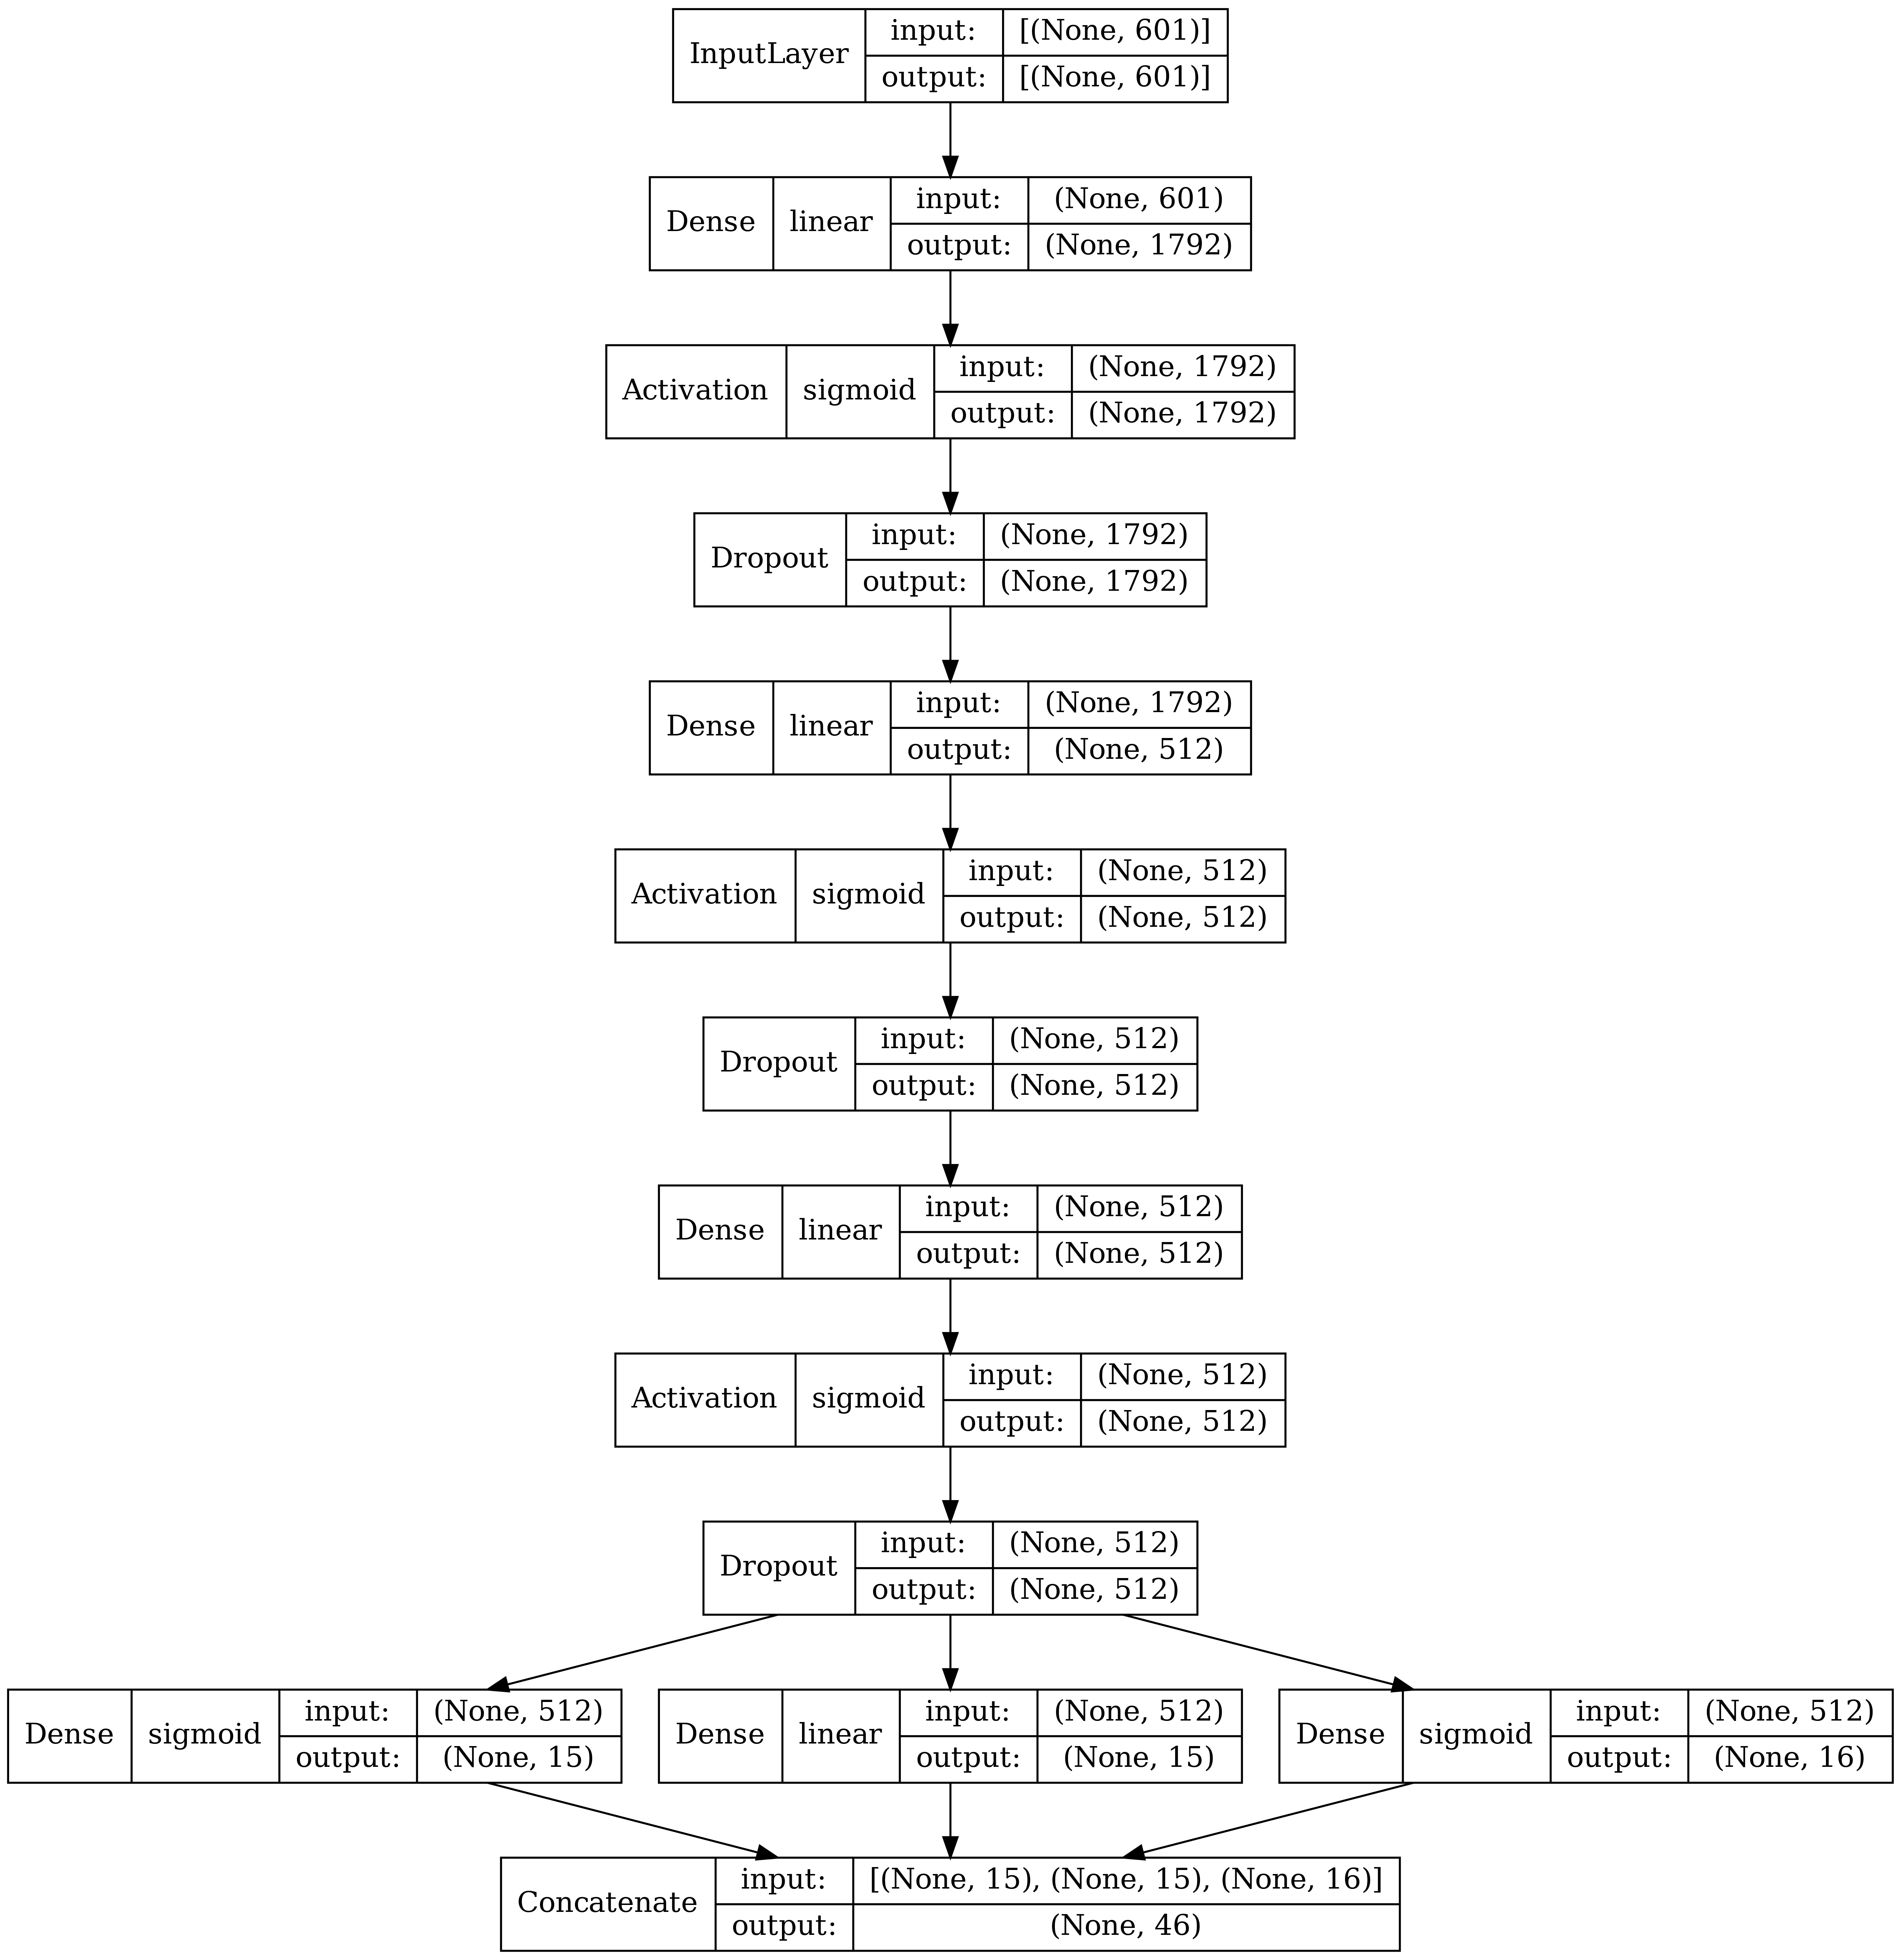

In [21]:
path = "./data_LR" + '/inet_DT.png'
plot_model(model,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)

## Evaluate I-Net Training Process

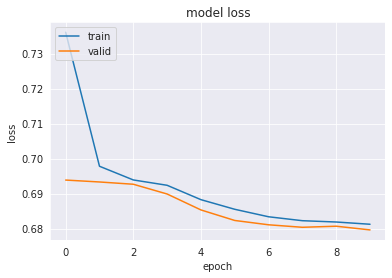

In [22]:
if nas:
    for trial in history: 
        print(trial.summary())
        
    writepath_nas = './results_nas.csv'

    if different_eval_data:
        flat_config = flatten_dict(config_train)
    else:
        flat_config = flatten_dict(config)    

    if not os.path.exists(writepath_nas):
        with open(writepath_nas, 'w+') as text_file:       
            for key in flat_config.keys():
                text_file.write(key)
                text_file.write(';')         

            for hp in history[0].hyperparameters.values.keys():
                text_file.write(hp + ';')    
               
            text_file.write('score')
            
            text_file.write('\n')

    with open(writepath_nas, 'a+') as text_file:  
        for value in flat_config.values():
            text_file.write(str(value))
            text_file.write(';')

        for hp, value in history[0].hyperparameters.values.items():
            text_file.write(str(value) + ';')        

        
        text_file.write(str(history[0].score))
            
        text_file.write('\n')            

        text_file.close()      
        
else:
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')    

# make_classification evaluation Paul

In [23]:
config_LR = {
    'data': {
        'n_datasets': 1000,   
    }
}

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, roc_curve, matthews_corrcoef

def precision(tp, fp, tn, fn):
    return tp / (tp + fp)
def recall(tp, fp, tn, fn):
    return tp / (tp + fn)
def f1(tp, fp, tn, fn):
    pre = precision(tp, fp, tn, fn)
    rec = recall(tp, fp, tn, fn)
    return 2 * (pre * rec) / (pre + rec)

In [25]:
def evaluateSingleSample(i, loss_function, metrics, config):
    
    informative = np.random.randint(config['data']['number_of_variables']//2, high=config['data']['number_of_variables']+1) #config['data']['number_of_variables']
    redundant = np.random.randint(0, high=config['data']['number_of_variables']-informative+1) #0
    repeated = config['data']['number_of_variables']-informative-redundant # 0

    #n_clusters_per_class =  max(2, np.random.randint(0, high=informative//2+1)) #2
    n_clusters_per_class = 1

    X_data, y_data = make_classification(n_samples=config['data']['lambda_dataset_size'], 
                                                       n_features=config['data']['number_of_variables'], #The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.
                                                       n_informative=informative,#config['data']['number_of_variables'], #The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative.
                                                       n_redundant=redundant, #The number of redundant features. These features are generated as random linear combinations of the informative features.
                                                       n_repeated=repeated, #The number of duplicated features, drawn randomly from the informative and the redundant features.
                                                       n_classes=config['data']['num_classes'], 
                                                       n_clusters_per_class=n_clusters_per_class, 
                                                       #flip_y=0.0, #The fraction of samples whose class is assigned randomly. 
                                                       #class_sep=1.0, #The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
                                                       #hypercube=False, #If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
                                                       #shift=0.0, #Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].
                                                       #scale=1.0, #Multiply features by the specified value. 
                                                       shuffle=True, 
                                                       random_state=100_000+i) 
    
    ## normalisierung
    for i, column in enumerate(X_data.T):
        scaler = MinMaxScaler()
        scaler.fit(column.reshape(-1, 1))
        X_data[:,i] = scaler.transform(column.reshape(-1, 1)).ravel()    
    
    X_train, y_train, X_valid, y_valid, X_test, y_test = split_train_test_valid(X_data, y_data, valid_frac=0.25, test_frac=0.1, seed=42)
    
    
    lambda_net = generate_base_model(config)
    
    x_lambda_weights = shaped_network_parameters_to_array(lambda_net.get_weights(), config)
    
    
    #### so meinte ich das quasi wie du ein logistic regression model basierend auf den lambda-net predictions bekommst ###
    #model_valid = LogisticRegression()
    #model_valid.fit(X_data, network_parameters_to_network(x_lambda_weights, config).predict(X_train))      
    #y_coef_truth = model_valid.coef_

        
    inet_model = load_inet(loss_function, metrics, config)
    
    y_dt_pred = inet_model.predict(x_lambda_weights.reshape(1, -1), verbose=0)
    y_dt_pred = y_dt_pred[0]
    
    ## hier für den vergleich dann das model auch auf den network parameters trainieren ###
    #model_groundTruth = get_LR(X_train, network_parameters_to_network(x_lambda_weights, config).predict(X_train)
    
    #model_pred = LogisticRegression()
    #model_pred.coef_ = y_coef_pred
    #model_pred.intercept_ = 0
    #model_pred.classes_ = model_groundTruth.classes_
    
    
    model_pred_inet = parameterDT(y_dt_pred, config)
    
    y_train_lambda_net = network_parameters_to_network(x_lambda_weights, config).predict(X_train, verbose=0)
    model_standard = DecisionTreeClassifier(max_depth=config['function_family']['maximum_depth']) 
    model_standard.fit(X_train, np.round(y_train_lambda_net))
    
    y_lambda_net = network_parameters_to_network(x_lambda_weights, config).predict(X_test, verbose=0).flatten()
    y_true = y_lambda_net
    y_lambda_net = np.round(y_lambda_net)
    y_true = y_lambda_net
    
    score_standard_model = model_standard.score(X_test, y_lambda_net)

    y_pred_standard_model = np.round(model_standard.predict(X_test))
    y_pred_inet_model  = model_pred_inet.predict(X_test)
    y_pred = y_pred_inet_model
    y_pred_inet_model = np.round(y_pred_inet_model)
    
    score_inet_model = accuracy_score(y_lambda_net, y_pred_inet_model)

    tn, fp, fn, tp = confusion_matrix(y_lambda_net, y_pred_inet_model, labels=[1,0]).ravel()
    
    pre = precision(tp, fp, tn, fn)
    rec = recall(tp, fp, tn, fn)
    fone = f1(tp, fp, tn, fn)
    
    mse = mean_squared_error(y_lambda_net, y_pred_inet_model)
    mcc = matthews_corrcoef(y_lambda_net, y_pred_inet_model)
    try:
        roc_score = roc_auc_score(y_lambda_net, y_pred_inet_model)
    except ValueError:
        print("ROC skipped")
        roc_score = None
        
    
    #results.append([i, score_groundTruthModel, score_predModel, mse, tp, fn, fp, tn, pre, rec, fone])
    
    return i+1, y_true, y_pred, mse, tp, fn, fp, tn, pre, rec, fone, roc_score, mcc


In [26]:
parallel = Parallel(n_jobs=config['computation']['n_jobs'], verbose=10, backend='loky') #loky
#parallel = Parallel(n_jobs=1, verbose=10, backend='loky') #loky

result_list = parallel(delayed(evaluateSingleSample)(i, loss_function, metrics, config) for i in range(config_LR['data']['n_datasets']))

results = pd.DataFrame(data=result_list,
                       columns=["index_0=aggregated", 
                                "y_true", 
                                "y_pred" , 
                                "mse",  
                                "tp", 
                                "fn", 
                                "fp", 
                                "tn", 
                                "precision", 
                                "recall", 
                                "f1",
                                "ROC-AUC",
                                "MCC"])


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    8.4s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:   10.3s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:   11.3s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:   16.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:   20.5s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   22.7s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   27.5s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   29.6s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   35.1s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   37.9s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   43.4s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   47.1s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   52.1s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   57.3s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped


[Parallel(n_jobs=50)]: Done 868 tasks      | elapsed:  2.7min
[Parallel(n_jobs=50)]: Done 1000 out of 1000 | elapsed:  3.1min finished


In [27]:
results.head(10)

,index_0=aggregated,y_true,y_pred,mse,tp,fn,fp,tn,precision,recall,f1,ROC-AUC,MCC
0,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.5047292, 0.5047292, 0.4972533, ...",0.484,258,242,0,0,1.000,0.516,0.681,-1.000,0.000
1,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4972533, 0.5047292, 0.5047292, 0.49896532, ...",0.412,294,206,0,0,1.000,0.588,0.741,-1.000,0.000
2,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.49896532, 0.49896532, 0.4992176...",0.270,365,135,0,0,1.000,0.730,0.844,-1.000,0.000
3,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.49896532, 0.49896532, 0.4972533...",0.392,304,196,0,0,1.000,0.608,0.756,-1.000,0.000
4,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.49896532, 0.49896532, 0.4989653...",0.408,296,204,0,0,1.000,0.592,0.744,-1.000,0.000
5,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5047292, 0.4972533, 0.49896532, 0.5047292, ...",0.446,277,223,0,0,1.000,0.554,0.713,-1.000,0.000
6,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5047292, 0.5047292, 0.5047292, 0.5047292, 0...",0.636,182,318,0,0,1.000,0.364,0.534,-1.000,0.000
7,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5047292, 0.49896532, 0.5047292, 0.5047292, ...",0.480,260,240,0,0,1.000,0.520,0.684,-1.000,0.000
8,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5047292, 0.49921763, 0.5047292, 0.5047292, ...",0.662,169,331,0,0,1.000,0.338,0.505,-1.000,0.000
9,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.5047292, 0.5015205, 0.5047292, ...",0.564,218,282,0,0,1.000,0.436,0.607,-1.000,0.000


In [33]:
aggregated = pd.DataFrame(results.mean()).transpose()

In [34]:
aggregated

,index_0=aggregated,mse,tp,fn,fp,tn,precision,recall,f1,ROC-AUC,MCC
0,10.000,0.451,274.606,225.317,0.076,0.001,1.000,0.549,0.700,-0.939,-0.002


In [35]:
aggregated.at[0, "index_0=aggregated"] = 0
result_aggregated = pd.concat([aggregated, results], axis=0, ignore_index=True)

In [36]:
result_aggregated

,index_0=aggregated,mse,tp,fn,fp,tn,precision,recall,f1,ROC-AUC,MCC,y_true,y_pred
0,0.000,0.451,274.606,225.317,0.076,0.001,1.000,0.549,0.700,-0.939,-0.002,NaN,NaN
1,10.000,0.484,258.000,242.000,0.000,0.000,1.000,0.516,0.681,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.5047292, 0.5047292, 0.4972533, ..."
2,10.000,0.412,294.000,206.000,0.000,0.000,1.000,0.588,0.741,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4972533, 0.5047292, 0.5047292, 0.49896532, ..."
3,10.000,0.270,365.000,135.000,0.000,0.000,1.000,0.730,0.844,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.49896532, 0.49896532, 0.4992176..."
4,10.000,0.392,304.000,196.000,0.000,0.000,1.000,0.608,0.756,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.49896532, 0.49896532, 0.4972533..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,10.000,0.482,259.000,241.000,0.000,0.000,1.000,0.518,0.682,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49896532, 0.5047292, 0.49896532, 0.49896532..."
997,10.000,0.308,346.000,154.000,0.000,0.000,1.000,0.692,0.818,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49620545, 0.49921763, 0.49896532, 0.4989653..."
998,10.000,0.438,281.000,219.000,0.000,0.000,1.000,0.562,0.720,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5047292, 0.5047292, 0.49896532, 0.49896532,..."
999,10.000,0.460,270.000,230.000,0.000,0.000,1.000,0.540,0.701,-1.000,0.000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4972533, 0.5047292, 0.5047292, 0.4972533, 0..."


ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC skipped
ROC 

In [44]:
result_aggregated[["index_0=aggregated", "mse", "tp", "fn", "fp", "tn", "precision", "recall", "f1", "ROC-AUC", "MCC"]].to_csv(f"./data/evalRes_inetDT_n{config['data']['number_of_variables']}_noise{config['i_net']['train_noise']}.csv")

In [45]:
nptmp = np.array(result_list)

In [46]:
y_true = nptmp[:, 1]
y_pred = nptmp[:, 2]

In [47]:
y_true = np.array(list(y_true), dtype=np.int).flatten()
y_pred = np.array(list(y_pred), dtype=np.float).flatten()

In [48]:
fpr, tpr, threshold = roc_curve(y_true, y_pred, drop_intermediate=False)

In [49]:
save_fprtpr = np.array([fpr, tpr, threshold])

In [50]:
path = "./data"

np.save(path + f"/fprTprThreshold_inetDT_n{config['data']['number_of_variables']}_noise{config['i_net']['train_noise']}", save_fprtpr, allow_pickle=True)